# Logistic Regression & Classification Evaluation

In [8]:
# Import dataset
from sklearn.datasets import load_breast_cancer
import pandas as pd

data = load_breast_cancer()
X = pd.DataFrame(data.data, columns = data.feature_names)
y = pd.Series(data.target, name = 'cancer')  # 0 = malignant, 1 = benign

In [10]:
# Creating training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [12]:
# Creating Logistic Regression model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver = 'liblinear')
model.fit(X_train, y_train)

# Predicting categories
y_pred = model.predict(X_test)

# Predicting probability (for ROC curve)
y_prob = model.predict_proba(X_test)[:,1]

In [44]:
# Accuracy and basic evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred), '\n')

# Confusion Matrix
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred), '\n')

# Classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.956140350877193 

Confusion Matrix: 
 [[39  4]
 [ 1 70]] 

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



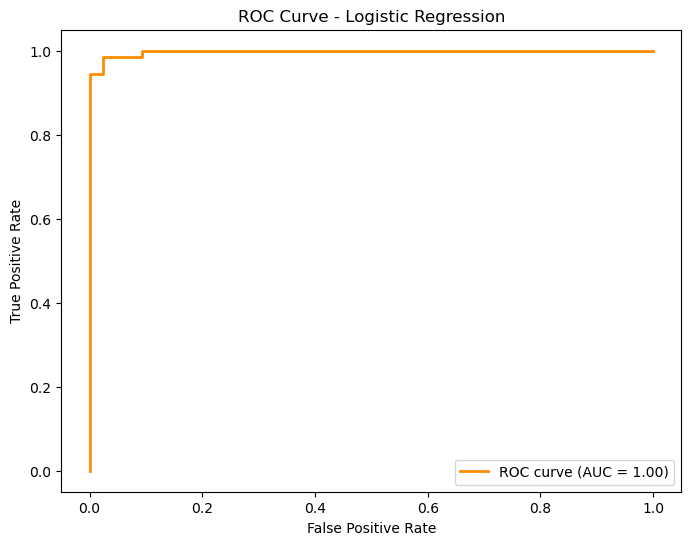

In [56]:
# Drawing ROC curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 計算 ROC 曲線所需的值
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# 繪製曲線
plt.figure(figsize = (8, 6))
plt.plot(fpr, tpr, color = 'darkorange', lw = 2, label = f'ROC curve (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc = "lower right")
plt.show()